# 윈도우에서 진행

# 크롤링 방법 1)

# 구글 플레이 스토어 리뷰 웹 크롤러
- Contributor: Tony Park
- References
    - Tistory Blog | https://heytech.tistory.com/
    - Github | https://github.com/park-gb
- Last Updated@2022-01-27

# 초기 설정

## 크롬 드라이버 세팅

In [6]:
# chrome_driver = '../chromedriver.exe' # 파일 확장자 이름 표기
chrome_driver = 'C:/Users/USER/Desktop/chromedriver.exe'# 파일 확장자 이름 미표기

## 수집 앱 URL

In [7]:
URL = 'https://play.google.com/store/apps/details?id=com.github.android'

# 패키지 import

In [8]:
! pip install beautifulsoup4
! pip install selenium
! pip install tqdm
! pip install pandas

In [9]:
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
from time import sleep
import random
from tqdm.auto import tqdm, trange
import pandas as pd

# 무한 스크롤 함수

In [10]:
def scroll(modal):
    try:        
        # 스크롤 높이 받아오기
        last_height = driver.execute_script("return arguments[0].scrollHeight", modal)
        while True:
            pause_time = random.uniform(0.5, 0.8)
            # 최하단까지 스크롤
            driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight);", modal)
            # 페이지 로딩 대기
            time.sleep(pause_time)
            # 무한 스크롤 동작을 위해 살짝 위로 스크롤
            driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight-50);", modal)
            time.sleep(pause_time)
            # 스크롤 높이 새롭게 받아오기
            new_height = driver.execute_script("return arguments[0].scrollHeight", modal)
            try:
                # '더보기' 버튼 있을 경우 클릭
                all_review_button = driver.find_element_by_xpath('/html/body/div[1]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[2]/div[2]/div/span/span').click()
            except:
                # 스크롤 완료 경우
                if new_height == last_height:
                    print("스크롤 완료")
                    break
                last_height = new_height
                
    except Exception as e:
        print("에러 발생: ", e)

# 데이터 크롤링

In [11]:
# 크롬 드라이버 세팅
driver = webdriver.Chrome(chrome_driver)
# 페이지 열기
driver.get(URL)
# 페이지 로딩 대기
wait = WebDriverWait(driver, 5)

# '리뷰 모두 보기' 버튼 렌더링 확인
all_review_button_xpath = '/html/body/c-wiz[2]/div/div/div[1]/div[2]/div/div[1]/c-wiz[3]/section/div/div/div[5]/div/div/button/span'
button_loading_wait = wait.until(EC.element_to_be_clickable((By.XPATH, all_review_button_xpath)))
# '리뷰 모두 보기' 버튼 클릭
driver.find_element_by_xpath(all_review_button_xpath).click()

# '리뷰 모두 보기' 페이지 렌더링 대기
all_review_page_xpath = '/html/body/div[4]/div[2]/div/div/div/div/div[2]'
page_loading_wait = wait.until(EC.element_to_be_clickable((By.XPATH, all_review_page_xpath)))

# 페이지 무한 스크롤 다운
modal = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='fysCi']")))
scroll(modal)

<ipython-input-11-ceda38f1b839>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_driver)
<ipython-input-11-ceda38f1b839>:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath(all_review_button_xpath).click()
<ipython-input-10-f7300b344f4d>:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  all_review_button = driver.find_element_by_xpath('/html/body/div[1]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[2]/div[2]/div/span/span').click()


에러 발생:  Message: stale element reference: element is not attached to the page document
  (Session info: chrome=100.0.4896.75)
Stacktrace:
Backtrace:
	Ordinal0 [0x01117413+2389011]
	Ordinal0 [0x010A9F61+1941345]
	Ordinal0 [0x00F9C658+837208]
	Ordinal0 [0x00F9F064+847972]
	Ordinal0 [0x00F9EF22+847650]
	Ordinal0 [0x00F9F89A+850074]
	Ordinal0 [0x00FF4D49+1199433]
	Ordinal0 [0x00FE414C+1130828]
	Ordinal0 [0x00FF4302+1196802]
	Ordinal0 [0x00FE3F66+1130342]
	Ordinal0 [0x00FBE546+976198]
	Ordinal0 [0x00FBF456+980054]
	GetHandleVerifier [0x012C9632+1727522]
	GetHandleVerifier [0x0137BA4D+2457661]
	GetHandleVerifier [0x011AEB81+569713]
	GetHandleVerifier [0x011ADD76+566118]
	Ordinal0 [0x010B0B2B+1968939]
	Ordinal0 [0x010B5988+1989000]
	Ordinal0 [0x010B5A75+1989237]
	Ordinal0 [0x010BECB1+2026673]
	BaseThreadInitThunk [0x773DFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77CD7A7E+286]
	RtlGetAppContainerNamedObjectPath [0x77CD7A4E+238]



# HTML Parsing

In [7]:
# html parsing하기
html_source = driver.page_source
soup_source = BeautifulSoup(html_source, 'html.parser')

# HTML 데이터 저장

In [8]:
# html 데이터 저장
with open("../dataset/data_html.html", "w", encoding = 'utf-8') as file:
    file.write(str(soup_source))

## 데이터프레임 변환

In [9]:
# 리뷰 데이터 클래스 접근
review_source = soup_source.find_all(class_ = 'RHo1pe')
# 리뷰 데이터 저장용 배열
dataset = []
# 데이터 넘버링을 위한 변수
review_num = 0 
# 리뷰 1개씩 접근해 정보 추출
for review in tqdm(review_source):
    review_num+=1
    # 리뷰 등록일 데이터 추출
    date_full = review.find_all(class_ = 'bp9Aid')[0].text
    date_year = date_full[0:4] # 연도 데이터 추출
    # 해당 단어가 등장한 인덱스 추출
    year_index = date_full.find('년')
    month_index = date_full.find('월')
    day_index = date_full.find('일')
    
    date_month = str(int(date_full[year_index+1:month_index])) # 월(Month) 데이터 추출
    # 월 정보가 1자리의 경우 앞에 0 붙이기(e.g., 1월 -> 01월)
    if len(date_month) == 1:
        date_month = '0' + date_month
    
    date_day = str(int(date_full[month_index+1:day_index])) # 일(Day) 데이터 추출 
    # 일 정보가 1자리의 경우 앞에 0 붙여줌(e.g., 7일 -> 07일)
    if len(date_day) == 1:
        date_day = '0' + date_day
    
    # 리뷰 등록일 full version은 최종적으로 yyyymmdd 형태로 저장
    date_full = date_year + date_month + date_day
    user_name = review.find_all(class_ = 'X5PpBb')[0].text # 닉네임 데이터 추출
    rating = review.find_all(class_ = "iXRFPc")[0]['aria-label'][10] # 평점 데이터 추출
    content = review.find_all(class_ = 'h3YV2d')[0].text # 리뷰 데이터 추출

    data = {
        "id": review_num, 
        "date": date_full,
        "dateYear": date_year,
        "dateMonth": date_month,
        "dateDay": date_day,
        "rating": rating,
        "userName": user_name,
        "content": content
    }
    dataset.append(data)

  0%|          | 0/62 [00:00<?, ?it/s]

## 데이터프레임 저장

In [10]:
df = pd.DataFrame(dataset)
df.to_csv('../dataset/review_dataset.csv', encoding = 'utf-8-sig') # csv 파일로 저장

# 리뷰 데이터 불러오기

In [11]:
# 저장한 리뷰 정보 불러오기
df = pd.read_csv('../dataset/review_dataset.csv', encoding = 'utf-8-sig')
df = df.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
df

,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,1,20210926,2021,9,26,5,tica,이것저것 할게 많은 GitHub의 특성상 모바일 웹 페이지로 접속하는 게 더 편하긴...
1,2,20211115,2021,11,15,3,Kh Shin,colab과 연결되어 실행할수 있으면 좋겠어요
2,3,20210801,2021,8,1,5,최치춘,그냥 간단하게 코드확인하긴좋은데 데스크탑에서 보는게 훨씬편함 어딘가 불편한 미묘한 UI
3,4,20200613,2020,6,13,5,참티즈는말지않긔,간단히 멘션 확인같은거 할때 좋음. 큰 코드는 당연하게도 모바일로는 힘들다.
4,5,20200318,2020,3,18,4,HTML ?,README.md의 gif파일이 표시가 이상하게 표시되는 문제가 있네요
...,...,...,...,...,...,...,...,...
57,58,20200318,2020,3,18,5,SEOKWON HONG,"working for harder, faster"
58,59,20200318,2020,3,18,5,프렌즈,Good
59,60,20200522,2020,5,22,5,Bear Black,Good!!
60,61,20200318,2020,3,18,5,Seonghun Kang,LGTM


# 크롤링 방법 2) *이걸로 데이터 크롤링 함

In [2]:
from selenium import webdriver

In [4]:
driver = webdriver.Chrome('C:/Users/USER/Desktop/chromedriver.exe')

<ipython-input-4-b040c2600032>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/USER/Desktop/chromedriver.exe')


In [ ]:
# 끝 페이지까지 다 도는데 이거 어떻게 만지면 좋을지 봐야함

In [3]:
from selenium import webdriver

driver = webdriver.Chrome('C:/Users/USER/Desktop/chromedriver.exe')
driver.implicitly_wait(3)

driver.get("http://www.yes24.com/Product/Goods/99308021") 

import time
time.sleep(2)


temp_list =[]


stopFlag = False

while True:
#1, 11, 21...
    readLinks = driver.find_elements_by_css_selector('#infoset_reviewContentList > div > div.reviewInfoBot.crop > a ') #더보기

    for readlink in readLinks:
        readlink.click()
        time.sleep(1)

    reviewList = driver.find_elements_by_css_selector('#infoset_reviewContentList > div.reviewInfoGrp.lnkExtend.infoMoreSubOn > div.reviewInfoBot.origin > div.review_cont')
    time.sleep(3)
    for review in reviewList :
        temp_list.append(review.text)
#2~10, 12~20 ...
    for n in range(4, 13):
        linkurl = '#infoset_reviewContentList > div.review_sort.sortTop > div.review_sortLft > div > a:nth-child('+ str(n) + ')'
        linkNum = driver.find_element_by_css_selector(linkurl)
        #linkNum.click()
        driver.execute_script("arguments[0].click()", linkNum)
        time.sleep(3)

        readLinks = driver.find_elements_by_css_selector('#infoset_reviewContentList > div > div.reviewInfoBot.crop > a ') #더보기

        for readlink in readLinks:
            readlink.click()
            #driver.execute_script("arguments[0].click()", linkNum)
            time.sleep(1)

        reviewList = driver.find_elements_by_css_selector('#infoset_reviewContentList > div.reviewInfoGrp.lnkExtend.infoMoreSubOn > div.reviewInfoBot.origin > div.review_cont')
        time.sleep(2)

        for review in reviewList:
            temp_list.append(review.text)

        if len(reviewList)<5:
            stopFlag = True
            break

    if stopFlag == True:
        break

    nextPage = '#infoset_reviewContentList > div.review_sort.sortTop > div.review_sortLft > div > a.bgYUI.next'

    linkNum = driver.find_element_by_css_selector(nextPage)
    driver.execute_script("arguments[0].click()", linkNum)
    time.sleep(3)

for item in temp_list:
    print(item)
wfile = open("C:/Users/USER/Desktop/file.text", 'w',-1,'utf-8')
wfile.writelines(temp_list)
wfile.close()



<ipython-input-3-6f5fbf540806>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/USER/Desktop/chromedriver.exe')
<ipython-input-3-6f5fbf540806>:19: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  readLinks = driver.find_elements_by_css_selector('#infoset_reviewContentList > div > div.reviewInfoBot.crop > a ') #더보기
<ipython-input-3-6f5fbf540806>:25: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  reviewList = driver.find_elements_by_css_selector('#infoset_reviewContentList > div.reviewInfoGrp.lnkExtend.infoMoreSubOn > div.reviewInfoBot.origin > div.review_cont')
<ipython-input-3-6f5fbf540806>:32: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) inste

제목만 보고는 요즘 너도나도 다 쓰는 에세인줄 알고 별로 보고싶지는 않았다. 
그러다가 우연히 한번 보게 되었는데 소설이네~~ 그것도 상당히 재미있는 소설.. 
사람과 사람사이의 관계에 대해서 얘기한다. 편의점을 지나쳐가는 사람들
코로나 시대에 사람과의 접촉이 없이 혼자 살아가는 사람들
이 책을 보고서 점점 자기 중심적이고, 이기적으로 살아가게 되는 현실에서 사람과의 관계에 대해 다시 한번 생각해보게 된다. 
가볍게 읽기 좋다~~
재미읽게 술술 읽었다~~ 
뒤늦은 후기를 씁니다. 벛꽃 에디션이 나온 것을 보고 이 책을 읽었을 때 감동이 되살아나서 적어봐요. 일상속에서 볼 수 있는 편의점, 출출할 때 감밥이나 샌드위치를 편하게 사먹을 수 있는 곳을 감성에 젖을 수 있는 문체로 소설로 풀어낸 책입니다. 코로나 19로 삭막해져 가슴 한 쪽이 굳어져 가는 느낌을 가지는 이 때에 한번 읽어보면 좋을 듯한 소설이에요. 작가의 다른 책들에도 관심이 가게 되었네요 : )
50년 동안 내가 읽은 책 중 이렇게 PPL이 난무하는 뻔뻔한 책은 처음이다. 아예 대놓고 하네? 그런데 이게 용서가 된다. 왜? 내 가슴을 따뜻하게 했으니까. 오늘 저녁 메뉴는 참참참에 옥수수털차? ^^
리뷰가 어지간히도 많이 달렸다. 인지상정. 내가 하나 더 보태야 표도 안 나겠네...
분위기가 아기자기하다. 작가 프로필 사진은 독거같은데...
망원동 브라더스도 읽어봐야지...^^
재이있음..이야기가 지루하지도않고
구매한날 퇴근하니 집앞에 책이와있네요
그날 다읽음..ㅜㅜ
집중도 잘되고 어려운내용도없고
한번시작하니 못끊어서 그냥 다읽음 ㅎ
조금 아쉬운점은 주인공 독고에대한 결론이좀 허무?
했다는건있지만 다르게보면 극히 현실적일수도있겠다는생각임
한편으로는 손님중에 나랑비슷한사람도있구나싶기도하고
왠지편의점가서 옥수수수염차를하나사서 마시고싶다는생각도들고
ㅎㅎ
  노숙자 출신 독고씨가 야간 알바를 하기 시작하면서 불편해진 편의점과 그 편의점을 팔아서 그 돈으로 자신의 사업을 시작하기위해 그 편의점을 시시탐탐 노리

# 데이터 저장

In [5]:
import pandas as pd
df = pd.DataFrame(temp_list)
df.to_csv('C:/Users/USER/Desktop/review_dataset.csv', encoding = 'utf-8-sig')

In [6]:
df = pd.read_csv('C:/Users/USER/Desktop/review_dataset.csv', encoding = 'utf-8-sig')
df = df.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
df

,0
0,제목만 보고는 요즘 너도나도 다 쓰는 에세인줄 알고 별로 보고싶지는 않았다. \n그...
1,뒤늦은 후기를 씁니다. 벛꽃 에디션이 나온 것을 보고 이 책을 읽었을 때 감동이 되...
2,50년 동안 내가 읽은 책 중 이렇게 PPL이 난무하는 뻔뻔한 책은 처음이다. 아예...
3,재이있음..이야기가 지루하지도않고\n구매한날 퇴근하니 집앞에 책이와있네요\n그날 다...
4,노숙자 출신 독고씨가 야간 알바를 하기 시작하면서 불편해진 편의점과 그 편의점을...
...,...
109,\n 단숨에 읽고만 책 한 권이 있다. 김호연 작가의 [불편한 편의점...
110,도서관에 있길래 낼름 대출한 책.\n편리하라고 여기저기 있는 가게인 편의점이 불편하...
111,작은 공간이지만 누군가의 전부이자 누군가의 직장이고 누군가의 시작점이자 누군가의 안...
112,읽는 즐거움을 쓰는 즐거움까지 이어지기를~~\n불편한 편의점을 읽으면서 마음이 따뜻...


# csv 파일을 다시 한 문장으로 받아오기
#### 위에서 csv로 바꾸지말고 txt파일로 둬도 될듯

In [23]:
content_all= '' 
for i in range(len(df['0'])):
    content_all = content_all + ' ' + df['0'].loc[i]

In [24]:
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all) #영어지우고 이상한 문자 지우기
content_all

' 제목만 보고는 요즘 너도나도 다 쓰는 에세인줄 알고 별로 보고싶지는 않았다 그러다가 우연히 한번 보게 되었는데 소설이네 그것도 상당히 재미있는 소설 사람과 사람사이의 관계에 대해서 얘기한다 편의점을 지나쳐가는 사람들코로나 시대에 사람과의 접촉이 없이 혼자 살아가는 사람들이 책을 보고서 점점 자기 중심적이고 이기적으로 살아가게 되는 현실에서 사람과의 관계에 대해 다시 한번 생각해보게 된다 가볍게 읽기 좋다재미읽게 술술 읽었다  뒤늦은 후기를 씁니다 벛꽃 에디션이 나온 것을 보고 이 책을 읽었을 때 감동이 되살아나서 적어봐요 일상속에서 볼 수 있는 편의점 출출할 때 감밥이나 샌드위치를 편하게 사먹을 수 있는 곳을 감성에 젖을 수 있는 문체로 소설로 풀어낸 책입니다 코로나 로 삭막해져 가슴 한 쪽이 굳어져 가는 느낌을 가지는 이 때에 한번 읽어보면 좋을 듯한 소설이에요 작가의 다른 책들에도 관심이 가게 되었네요   년 동안 내가 읽은 책 중 이렇게 이 난무하는 뻔뻔한 책은 처음이다 아예 대놓고 하네 그런데 이게 용서가 된다 왜 내 가슴을 따뜻하게 했으니까 오늘 저녁 메뉴는 참참참에 옥수수털차 리뷰가 어지간히도 많이 달렸다 인지상정 내가 하나 더 보태야 표도 안 나겠네분위기가 아기자기하다 작가 프로필 사진은 독거같은데망원동 브라더스도 읽어봐야지 재이있음이야기가 지루하지도않고구매한날 퇴근하니 집앞에 책이와있네요그날 다읽음ㅜㅜ집중도 잘되고 어려운내용도없고한번시작하니 못끊어서 그냥 다읽음 ㅎ조금 아쉬운점은 주인공 독고에대한 결론이좀 허무했다는건있지만 다르게보면 극히 현실적일수도있겠다는생각임한편으로는 손님중에 나랑비슷한사람도있구나싶기도하고왠지편의점가서 옥수수수염차를하나사서 마시고싶다는생각도들고ㅎㅎ   노숙자 출신 독고씨가 야간 알바를 하기 시작하면서 불편해진 편의점과 그 편의점을 팔아서 그 돈으로 자신의 사업을 시작하기위해 그 편의점을 시시탐탐 노리는 편의점 사장아들 독고씨는 사장아들에게서 편의점을 지킬수 있을까  처음에는 독고씨를 불편해하지만 차츰 친절한 그에게 도움을

# 모두 문자열로 전환_오류 방지

In [25]:
content_all = str(content_all)
content_all

' 제목만 보고는 요즘 너도나도 다 쓰는 에세인줄 알고 별로 보고싶지는 않았다 그러다가 우연히 한번 보게 되었는데 소설이네 그것도 상당히 재미있는 소설 사람과 사람사이의 관계에 대해서 얘기한다 편의점을 지나쳐가는 사람들코로나 시대에 사람과의 접촉이 없이 혼자 살아가는 사람들이 책을 보고서 점점 자기 중심적이고 이기적으로 살아가게 되는 현실에서 사람과의 관계에 대해 다시 한번 생각해보게 된다 가볍게 읽기 좋다재미읽게 술술 읽었다  뒤늦은 후기를 씁니다 벛꽃 에디션이 나온 것을 보고 이 책을 읽었을 때 감동이 되살아나서 적어봐요 일상속에서 볼 수 있는 편의점 출출할 때 감밥이나 샌드위치를 편하게 사먹을 수 있는 곳을 감성에 젖을 수 있는 문체로 소설로 풀어낸 책입니다 코로나 로 삭막해져 가슴 한 쪽이 굳어져 가는 느낌을 가지는 이 때에 한번 읽어보면 좋을 듯한 소설이에요 작가의 다른 책들에도 관심이 가게 되었네요   년 동안 내가 읽은 책 중 이렇게 이 난무하는 뻔뻔한 책은 처음이다 아예 대놓고 하네 그런데 이게 용서가 된다 왜 내 가슴을 따뜻하게 했으니까 오늘 저녁 메뉴는 참참참에 옥수수털차 리뷰가 어지간히도 많이 달렸다 인지상정 내가 하나 더 보태야 표도 안 나겠네분위기가 아기자기하다 작가 프로필 사진은 독거같은데망원동 브라더스도 읽어봐야지 재이있음이야기가 지루하지도않고구매한날 퇴근하니 집앞에 책이와있네요그날 다읽음ㅜㅜ집중도 잘되고 어려운내용도없고한번시작하니 못끊어서 그냥 다읽음 ㅎ조금 아쉬운점은 주인공 독고에대한 결론이좀 허무했다는건있지만 다르게보면 극히 현실적일수도있겠다는생각임한편으로는 손님중에 나랑비슷한사람도있구나싶기도하고왠지편의점가서 옥수수수염차를하나사서 마시고싶다는생각도들고ㅎㅎ   노숙자 출신 독고씨가 야간 알바를 하기 시작하면서 불편해진 편의점과 그 편의점을 팔아서 그 돈으로 자신의 사업을 시작하기위해 그 편의점을 시시탐탐 노리는 편의점 사장아들 독고씨는 사장아들에게서 편의점을 지킬수 있을까  처음에는 독고씨를 불편해하지만 차츰 친절한 그에게 도움을

# 명사로 추출(띄어쓰기 기준인가)

In [27]:
! pip install konlpy

In [28]:
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['제목',
 '보고',
 '요즘',
 '도나',
 '에세',
 '줄',
 '알',
 '별로',
 '한번',
 '소설',
 '그것',
 '소설',
 '사람과',
 '람사',
 '관계',
 '대해',
 '얘기',
 '편의점',
 '사람',
 '코로나',
 '시대',
 '사람',
 '접촉',
 '혼자',
 '사람',
 '책',
 '보고서',
 '점점',
 '자기',
 '중심',
 '기적',
 '현실',
 '사람',
 '관계',
 '대해',
 '다시',
 '한번',
 '생각',
 '재미',
 '술술',
 '후기',
 '벛꽃',
 '에디',
 '션',
 '것',
 '보고',
 '이',
 '책',
 '때',
 '감동',
 '상속',
 '볼',
 '수',
 '편의점',
 '때',
 '감밥',
 '샌드위치',
 '수',
 '곳',
 '감성',
 '젖',
 '수',
 '문체',
 '소설',
 '책',
 '코로나',
 '로',
 '가슴',
 '쪽',
 '느낌',
 '이',
 '때',
 '한번',
 '듯',
 '소설',
 '작가',
 '다른',
 '책',
 '관심',
 '가게',
 '년',
 '동안',
 '내',
 '책',
 '중',
 '이',
 '난무',
 '뻔',
 '책',
 '처음',
 '아예',
 '이',
 '용서',
 '왜',
 '내',
 '가슴',
 '오늘',
 '저녁',
 '메뉴',
 '옥수수',
 '털차',
 '리뷰',
 '인지상정',
 '내',
 '하나',
 '더',
 '보태',
 '표',
 '안',
 '분위기',
 '작가',
 '프로필',
 '사진',
 '독거',
 '망원동',
 '브라더스',
 '이야기',
 '구매',
 '날',
 '퇴근',
 '집앞',
 '책',
 '그날',
 '집중',
 '용도',
 '한번',
 '시작',
 '그냥',
 '조금',
 '점',
 '주인공',
 '독고',
 '대한',
 '결론',
 '좀',
 '극히',
 '현실',
 '수도',
 '생각',
 '임',
 '한편',
 '손님',
 '나',
 '사람',
 '기도',
 '편의점',
 

# 단어 빈도 세기

In [29]:
from collections import Counter #jdk에서 제공하는 라이브러리
count = Counter(nouns_txt) #nouns_txt에서 nouns 개수를 세서 몇개인지 넣어라
count
rank_text = count.most_common() #내림차순 정렬

# 불용어 처리 

In [30]:
rank_text = dict(rank_text)
count_len = 10
temp_dic={}
#items를 안쓰면 키,벨류 값 모두 나오지 않는다.
for key, value in rank_text.items():
    if value > count_len:
        temp_dic[key] = value
rank_text = temp_dic

k_stopword=pd.read_csv("C:/Users/USER/Desktop/korean_stopword.csv")
k_stopword = list(k_stopword['불용어'])
k_stopword.append('어요')

temp_dic = {}
for key, value in rank_text.items():
    if key not in k_stopword: #stopword가 아닌(not in) 키값만 다시 모아서
        temp_dic[key] = value

# 워드 클라우드

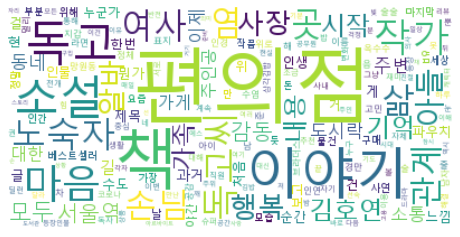

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wordcloud = WordCloud(font_path="C:/Users/USER/Desktop/Fonts/malgun.ttf",
                      background_color="white",
                      max_words = 50 # 출력할 단어 갯수)

wc = wordcloud.generate_from_frequencies(temp_dic)
plt.figure(figsize=(8,15))
plt.imshow(wc)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 불용어 처리 안 했을 때

In [11]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_family = font_manager.FontProperties('Malgun Gothic').get_name()

plt.rcParams["font.family"] = font_family

In [13]:
!pip install WordCloud

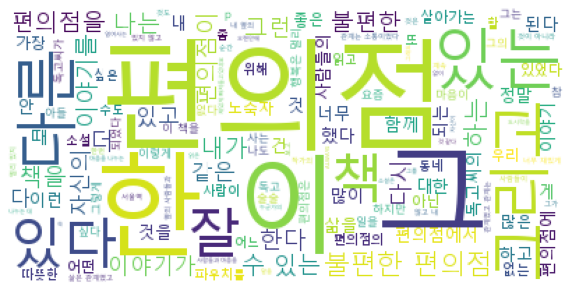

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

text = open('C:/Users/USER/Desktop/review_dataset.csv', encoding='UTF-8')
text = text.read()

text = text.replace('/n', " ")

wc = WordCloud(font_path = "C:/Windows/Fonts/malgun.ttf", 
               background_color="white")
wc.generate(text)

plt.figure(figsize=(10,10))
plt.rcParams["font.family"]
plt.axis("off")
plt.imshow(wc)
plt.show()